In [2]:
import dill
import scenicplus
import numpy as np
infile = open('/home/adufour/work/scenic_omics/embryos/SCENIC/scplus_obj.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

In [1]:
import plotnine

from plotnine import *
from plotnine import data

In [4]:
scplus_obj.X_EXP = scplus_obj.X_EXP[np.logical_not(scplus_obj.metadata_cell["GEX_Clusters_Time"].isin(["C1_J9", "C1_J11", "C3_J7"]))]

In [5]:
scplus_obj.metadata_cell = scplus_obj.metadata_cell[np.logical_not(scplus_obj.metadata_cell["GEX_Clusters_Time"].isin(["C1_J9", "C1_J11", "C3_J7"]))]

In [6]:
size_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based']
color_matrix = scplus_obj.uns['eRegulon_AUC']['Region_based']
subset_eRegulons = scplus_obj.uns['selected_eRegulons']['Gene_based']

In [7]:
subset_eRegulons = [x.split('_(')[0] for x in subset_eRegulons]
size_matrix = size_matrix[[x for x in size_matrix if x.split('_(')[0] in subset_eRegulons]]
color_matrix = color_matrix[[x for x in color_matrix if x.split('_(')[0] in subset_eRegulons]]

In [8]:
scplus_obj.metadata_cell = scplus_obj.metadata_cell[scplus_obj.metadata_cell['GEX_Clusters'].str.contains("C2") ==False]

In [9]:
scplus_obj.metadata_cell = scplus_obj.metadata_cell[scplus_obj.metadata_cell['GEX_Clusters'].str.contains("C4") ==False]

In [10]:
size_matrix = size_matrix.loc[scplus_obj.metadata_cell.index]

In [11]:
color_matrix = color_matrix.loc[scplus_obj.metadata_cell.index]

In [12]:
from scenicplus.plotting.dotplot import *
from plotnine import guide_legend
plot = heatmap_dotplot(
        scplus_obj = scplus_obj,
        size_matrix = size_matrix,
        color_matrix = color_matrix,
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_Clusters_Time',
        subset_eRegulons = subset_eRegulons,
        figsize = (35, 15),
        orientation = 'horizontal',
        split_repressor_activator=True)

In [10]:
plotting_df = generate_dotplot_df(
        scplus_obj = scplus_obj,
        size_matrix = size_matrix,
        color_matrix = color_matrix,
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_Clusters',
        subset_eRegulons = subset_eRegulons)

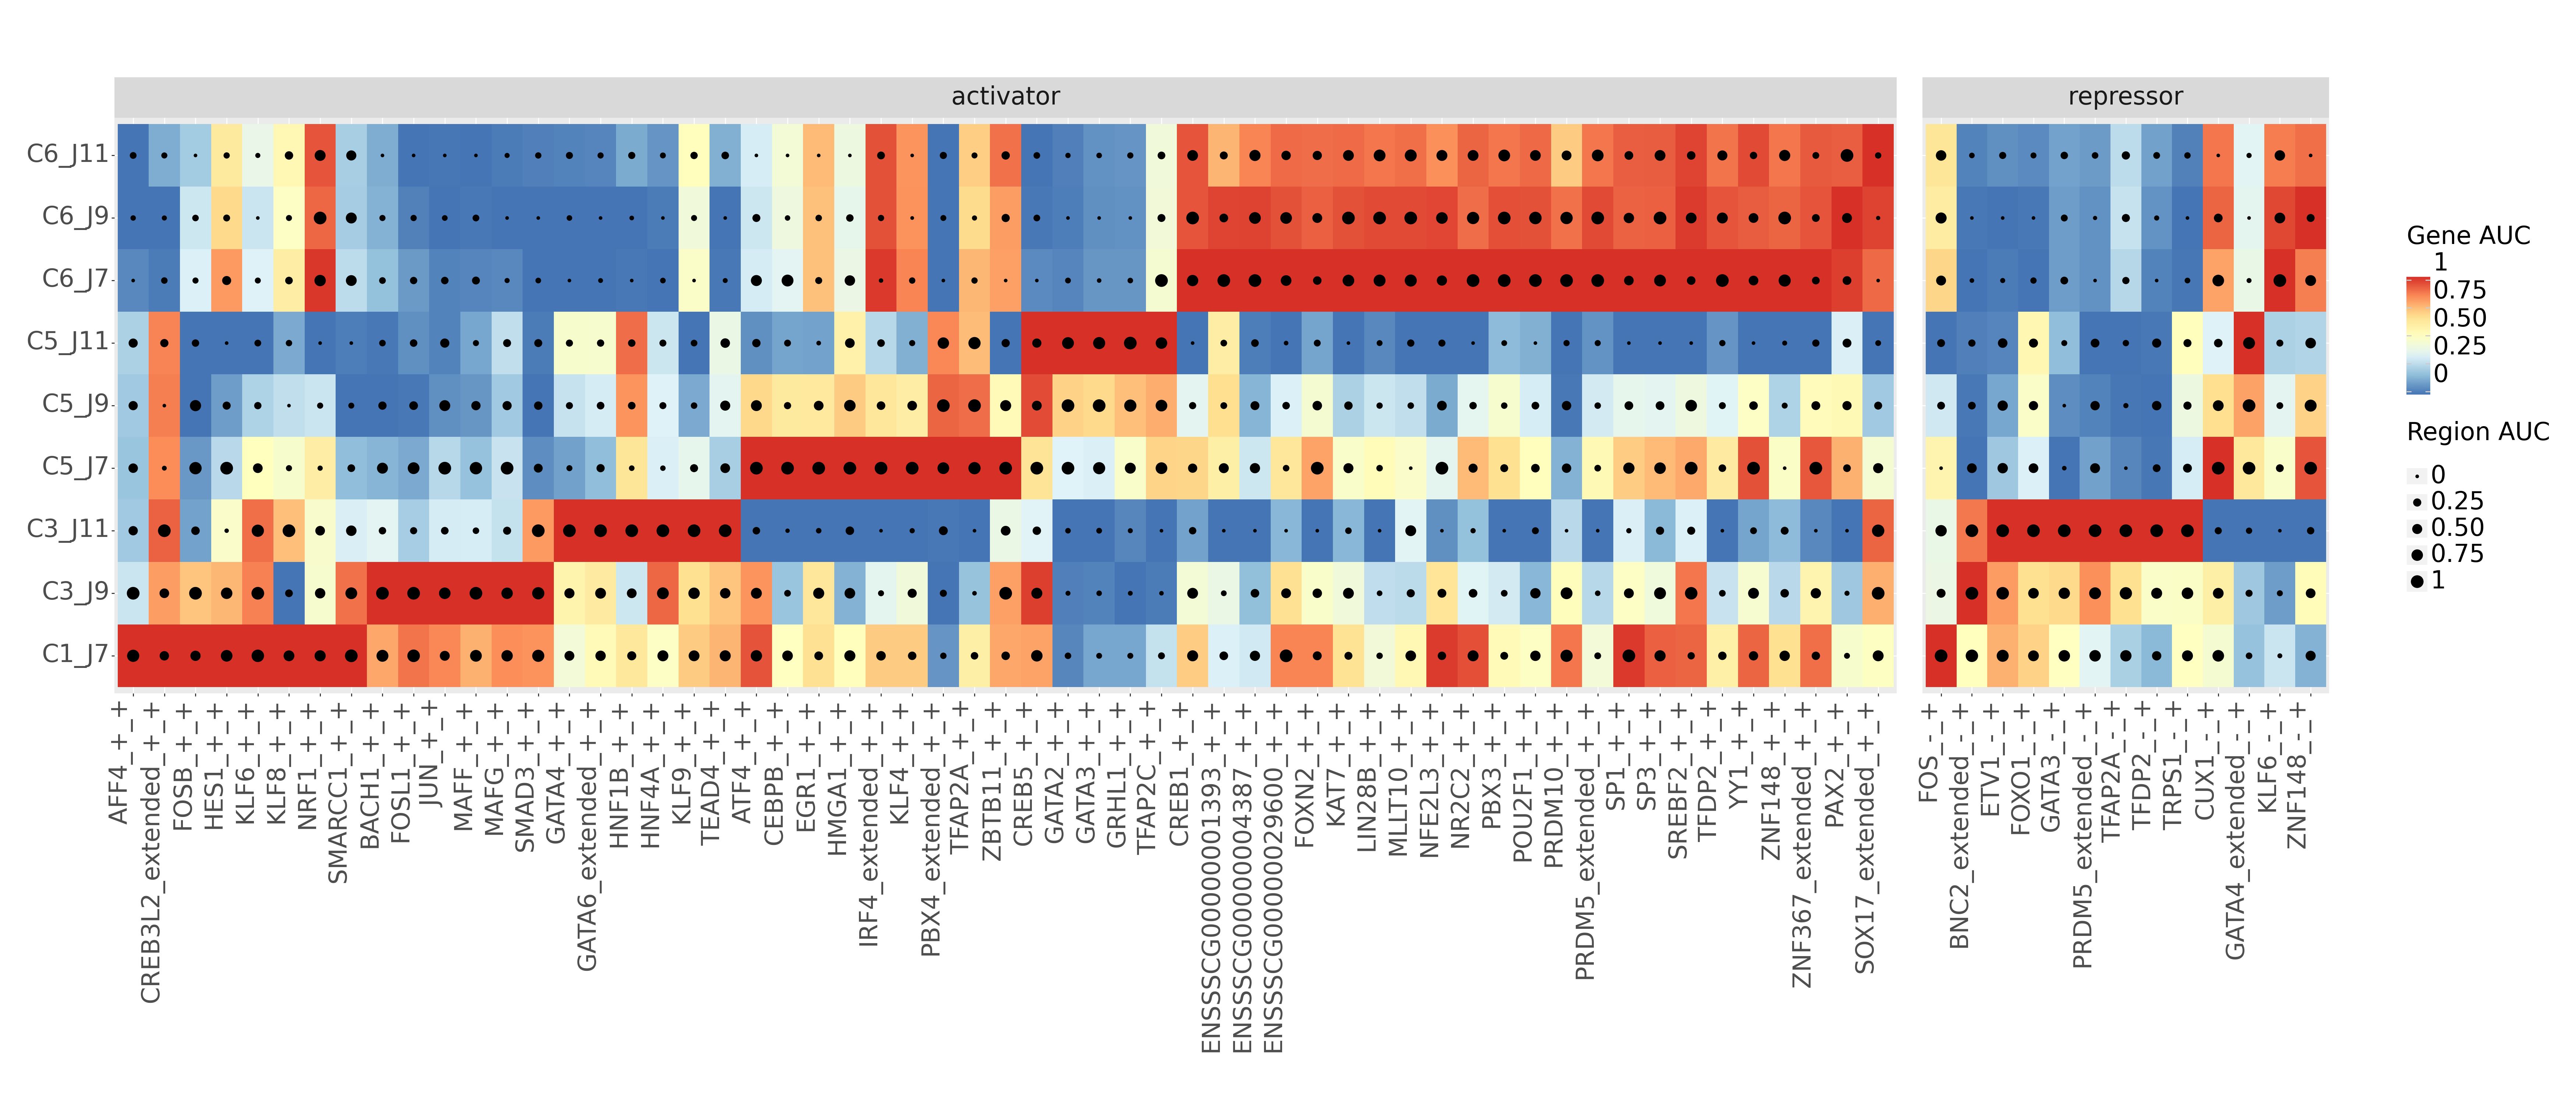

<Figure Size: (3500 x 1500)>

In [13]:
plot = plot + labs(size = 'Region AUC', fill = "Gene AUC") + theme(text=element_text(size = 24),axis_title_x=element_blank(),axis_title_y=element_blank())
plot

In [14]:
plot.save(filename='/home/adufour/work/notebook/plots/omics/scenic_Heatmap_embryo.svg', limitsize=False)

/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 35 x 15 in image.
/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/adufour/work/notebook/plots/omics/scenic_Heatmap_embryo.svg
